In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [122]:
file_path = "./ref/출입국항구내외국인성별국제이동연간_20250305.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")
ori.tail()

,출입국항별,내외국인별,성별,시점,항목,데이터
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388
183,인천공항,외국인,여자,2023,출국자,130769


In [123]:
ex1_data = ori.copy()
ex1_data.columns = ["airport", "type1", "gender", "year", "type2", "value"]
ex1_data

,airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [124]:
filter1 =  ex1_data["type1"]=="외국인"
ex1_data[filter1]

,airport,type1,gender,year,type2,value
92,인천공항,외국인,남자,2001,입국자,60699
93,인천공항,외국인,남자,2001,출국자,44548
94,인천공항,외국인,남자,2002,입국자,77745
95,인천공항,외국인,남자,2002,출국자,58784
96,인천공항,외국인,남자,2003,입국자,85643
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [125]:
ex1_data = ex1_data.groupby("year")["value"].sum().reset_index(name="total")
ex1_data

,year,total
0,2001,521210
1,2002,697631
2,2003,747272
3,2004,769912
4,2005,991717
5,2006,996275
6,2007,1012415
7,2008,1080247
8,2009,1009778
9,2010,1019086


In [126]:
# 입국
ex2_data = ori.copy()
ex2_data.columns = ["airport", "type1", "gender", "year", "type2", "value"]
# 출국
ex3_data = ori.copy()
ex3_data.columns = ["airport", "type1", "gender", "year", "type2", "value"]
# ex4_data = ori.copy()
# ex4_data.columns = ["airport", "type1", "gender", "year", "type2", "value"]

In [127]:
filter2 = ex2_data["type2"]=="입국자"
ex2_filtered = ex2_data[filter2]
filter3 = ex3_data["type2"]=="출국자"
ex3_filtered = ex3_data[filter3]
ex2_data = ex2_filtered.groupby("year")["value"].sum().reset_index(name="total")
ex3_data = ex3_filtered.groupby("year")["value"].sum().reset_index(name="total")

In [128]:
# 윈도우용 폰트 경로 설정
from matplotlib import rc
path = "C:\\Windows\\Fonts\\NanumGothicLight.otf"
font_name = fm.FontProperties(fname = path).get_name()
rc("font", family = font_name)

In [129]:
ex2_data = ex2_data.iloc[2:]
ex3_data = ex3_data.iloc[2:]
ex3_data

,year,total
2,2003,397977
3,2004,405144
4,2005,540062
5,2006,484238
6,2007,477711
7,2008,517059
8,2009,495148
9,2010,470250
10,2011,479113
11,2012,1474525


<Axes: title={'center': '2003 ~ 2023년 인천공항 입국 외국인 차트'}>

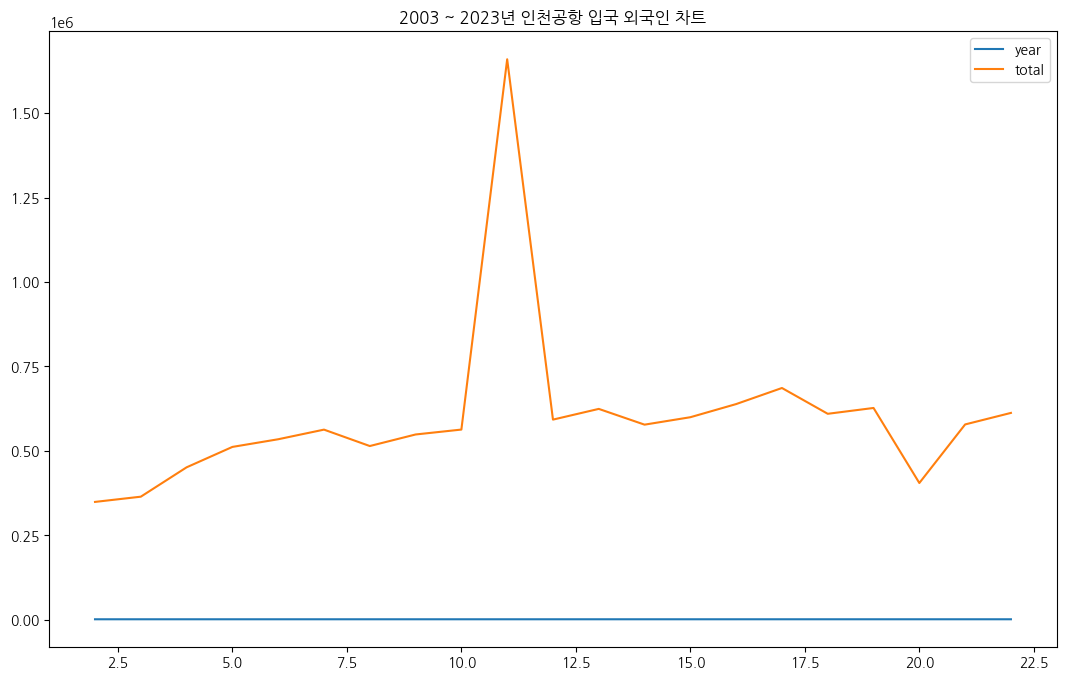

In [130]:
ex2_data.plot(figsize=(13,8), title="2003 ~ 2023년 인천공항 입국 외국인 차트")
# plt.show()

<Axes: title={'center': '2003 ~ 2023년 인천공항 출국 외국인 차트'}>

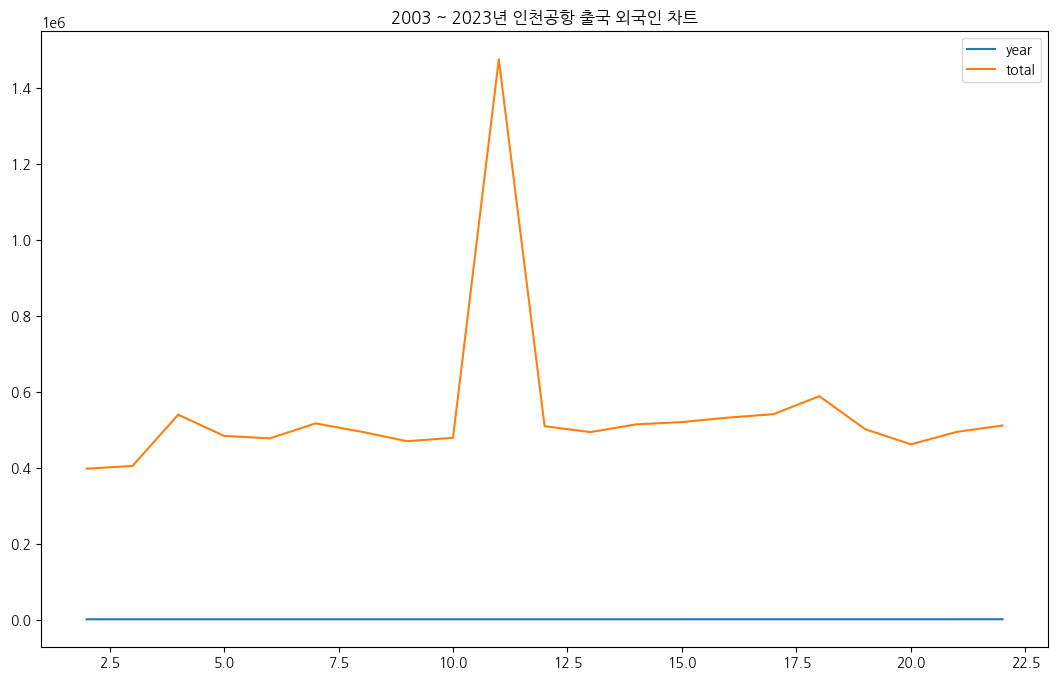

In [132]:
ex3_data.plot(figsize=(13,8), title="2003 ~ 2023년 인천공항 출국 외국인 차트")
# plt.show()

In [140]:
from prophet import Prophet

In [141]:
# 페이스북에서는 time(year)을 ds, value는 y를 사용하므로 전처리 해준다
ex4_data = ex1_data.copy()
ex4_data["year"] = pd.to_datetime(ex4_data["year"], format="%Y")
ex4_data = ex4_data.rename(columns={"year":"ds", "total":"y"})
ex4_data.tail()

,ds,y
18,2019-01-01,1198598
19,2020-01-01,1129092
20,2021-01-01,867277
21,2022-01-01,1073387
22,2023-01-01,1124211


In [142]:
m = Prophet()
m.fit(ex4_data)

14:24:10 - cmdstanpy - INFO - Chain [1] start processing
14:24:10 - cmdstanpy - INFO - Chain [1] done processing


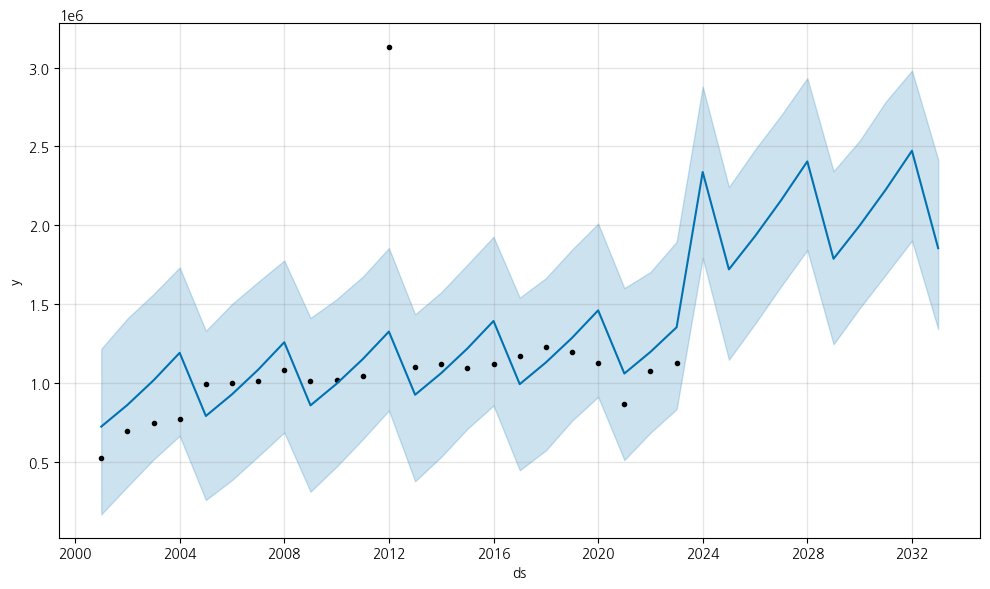

In [143]:
future = m.make_future_dataframe(periods=10, freq="YE")
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig("./chart/인천공항_예측.png")
plt.show()

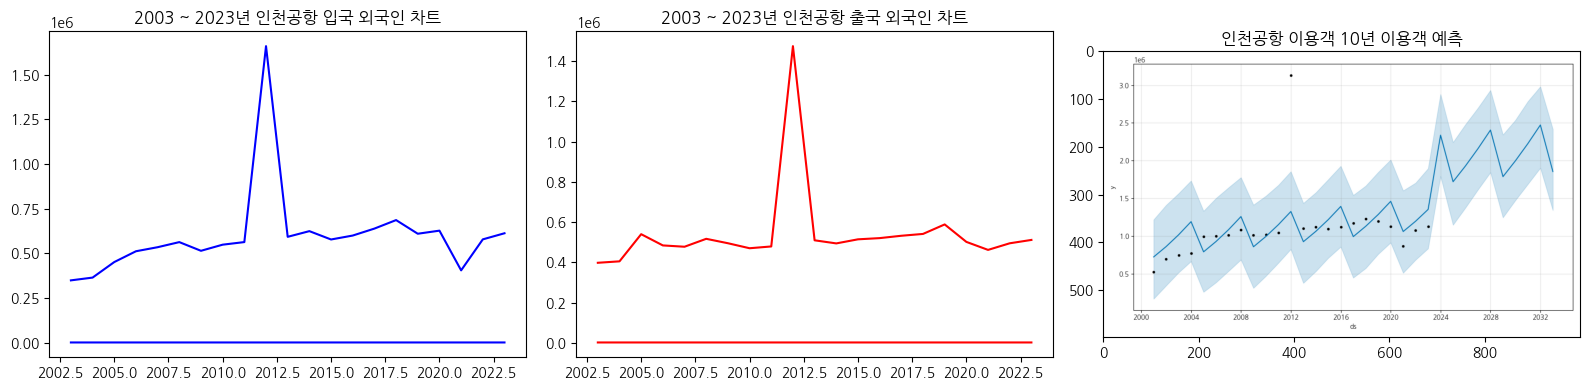

In [147]:
import matplotlib.pyplot as plt

img = mpimg.imread("./chart/인천공항_예측.png")

fig, axs = plt.subplots(1,3,figsize=(16,4))  # 2*2 서브플롯 생성

axs[0].plot(ex2_data["year"], ex2_data, color="b")
axs[1].plot(ex3_data["year"], ex3_data, color="r")
axs[2].plot(ex2_data["year"], ex2_data, color="b")
axs[2].plot(ex3_data["year"], ex3_data, color="r")
axs[0].set_title("2003 ~ 2023년 인천공항 입국 외국인 차트")
axs[1].set_title("2003 ~ 2023년 인천공항 출국 외국인 차트")
axs[2].set_title("인천공항 이용객 10년 이용객 예측")

axins = fig.add_axes(axs[2])
axins.imshow(img)
plt.tight_layout()
plt.show()

2012년 외국인 출입국자가 눈에 띄게 뛰었고, 2020년 코로나의 여파로 출입국자 수가 현저히 낮아진 걸 볼 수 있다.